In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cartopy as cp
import contextily as ctx

In [2]:
# load KNMI radar data
filename = r'RAD_NL25_PCP_NA_201910281900.h5'
f = h5py.File(filename, 'r')

im = np.copy(f['image1']['image_data'])
f.close()
arr = np.ma.masked_where(im==255, im)
arr = np.ma.masked_where(arr<2, arr)

In [3]:
# define geotransform / rastersize
gt = (0.0, 1.0, 0.0, -3650.0, 0.0, -1.0)
xsize, ysize = (700, 765)

# upper left coord
xul = gt[0]
yul = gt[3]

# stepsize
xres = gt[1]
yres = gt[5]

# get the edge coordinates and add half the resolution 
# to go to center coordinates
xmin = xul + xres * 0.5
xmax = xul + (xres * xsize) - xres * 0.5
ymin = yul + (yres * ysize) + yres * 0.5
ymax = yul - yres * 0.5

# define x and y values
xs = np.mgrid[xmin:xmax+xres:xres]
ys = np.mgrid[ymax+yres:ymin:yres]

In [4]:
# projection source data
globe = cp.crs.Globe(semimajor_axis=6378.14, semiminor_axis=6356.75)
crs_data = cp.crs.Stereographic(central_latitude=90, central_longitude=0, false_easting=0, false_northing=0, true_scale_latitude=60, globe=globe)

# projection RD
crs_projection = cp.crs.Stereographic(central_longitude=5.3876388888, central_latitude=52.15616055555, false_easting=155000, false_northing=463000, scale_factor=0.9999079)

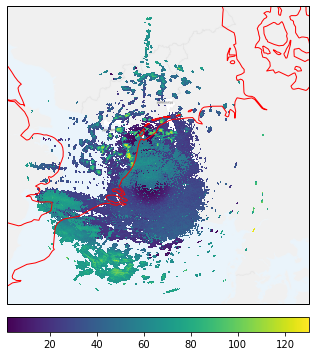

In [5]:
# figure is in RD
plt.figure(figsize=(5.4, 6))
ax = plt.axes(projection=crs_projection)
# define extent in degrees
ax.set_extent([0, 10.86, 48.90, 55.97], crs=cp.crs.PlateCarree())
# add shapefile 
ax.coastlines(resolution='50m', color='r', linewidth=1)
# add the radar data + colorbar
im = ax.pcolormesh(xs, ys, arr, transform=crs_data)
cb = plt.colorbar(im, fraction=0.0476, pad=0.04, orientation='horizontal')
# add BRTachtergrondkaartgrijs as basemap
ctx.add_basemap(ax, crs=crs_projection.proj4_init, attribution='', source=ctx.providers.nlmaps.grijs)
plt.show()